## code for graphical confusion matrix 

In [1]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


## importing packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import itertools

# pandas_entropy is a .py file tht calculates entropy
#import pandas_entropy as pe

#import plot_conf_mat as cnf

Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Loading Data

In [3]:
df1 = pd.read_csv('./sensor_data/sensorData_23-03-2018_15217898569-12_55.txt')
df2 = pd.read_csv('./sensor_data/sensorData_23-03-2018_15217899985-1_02.txt')
df3 = pd.read_csv('./sensor_data/sensorData_23-03-2018_15217903881-1_06.txt')
df4 = pd.read_csv('./sensor_data/sensorData_23-03-2018_15217906095-1_09.txt')
df5 = pd.read_csv('./sensor_data/sensorData_23-03-2018_15217913809-1_24.txt')
df6 = pd.read_csv('./sensor_data/sensorData_23-03-2018_15217883948-12_31.txt')
df7 = pd.read_csv('./sensor_data/sensorData_23-03-2018_15217908058-1_13.txt')
df8 = pd.read_csv('./sensor_data_old/sensorData_19-03-2018_15214527501_15-18.txt')
df9 = pd.read_csv('./sensor_data_old/sensorData_19-03-2018_15214537070_15-34.txt')

# skip below file : NaN problem with data
#df10 = pd.read_csv('./sensor_data_old/sensorData_19-03-2018_15214540891_15-41.txt')

df11 = pd.read_csv('./sensor_data_old/sensorData_19-03-2018_15214551353_15-58.txt')
df12 = pd.read_csv('./sensor_data_old/sensorData_19-03-2018_15214560034_16-13.txt')
df13 = pd.read_csv('./sensor_data_new/sensorData_04-04-2018_15228184860-10_53.txt')
df14 = pd.read_csv('./sensor_data_new/sensorData_04-04-2018_15228194973-10_58.txt')
df15 = pd.read_csv('./sensor_data_new/sensorData_04-04-2018_15228197814-11_02.txt')
df16 = pd.read_csv('./sensor_data_new/sensorData_04-04-2018_15228200158-11_06.txt')
df17 = pd.read_csv('./sensor_data_new/sensorData_04-04-2018_15228202727-11_14.txt')
df18 = pd.read_csv('./sensor_data_new/sensorData_04-04-2018_15228207467-11_36.txt')
df19 = pd.read_csv('./sensor_data_new/sensorData_04-04-2018_15228271593-1_24.txt')
df20 = pd.read_csv('./sensor_data_new/sensorData_04-04-2018_15228285553-1_47.txt')


# dataframes for pothole annotated files

pdf1 = pd.read_csv('./potholes/sensorData_23-03-2018_15217898607-12_55.txt')
pdf2 = pd.read_csv('./potholes/sensorData_23-03-2018_15217899997-1_02.txt')
pdf3 = pd.read_csv('./potholes/sensorData_23-03-2018_15217903905-1_06.txt')
pdf4 = pd.read_csv('./potholes/sensorData_23-03-2018_15217906130-1_09.txt')
pdf5 = pd.read_csv('./potholes/sensorData_23-03-2018_15217914003-1_24.txt')
pdf6 = pd.read_csv('./potholes/sensorData_23-03-2018_15217883957-12_31.txt')
pdf7 = pd.read_csv('./potholes/sensorData_23-03-2018_15217908081-1_13.txt')
pdf8 = pd.read_csv('./potholes_old/sensorData_19-03-2018_15214527532_15-18.txt')
pdf9 = pd.read_csv('./potholes_old/sensorData_19-03-2018_15214537329_15-34.txt')

# below file contains Nan values
#pdf10 = pd.read_csv('./potholes_old/sensorData_19-03-2018_15214540946_15-41.txt')

pdf11 = pd.read_csv('./potholes_old/sensorData_19-03-2018_15214551395_15-58.txt')
pdf12 = pd.read_csv('./potholes_old/sensorData_19-03-2018_15214560096_16-13.txt')
pdf13 = pd.read_csv('./potholes_new/sensorData_04-04-2018_15228184880-10_53.txt')
pdf14 = pd.read_csv('./potholes_new/sensorData_04-04-2018_15228194989-10_58.txt')
pdf15 = pd.read_csv('./potholes_new/sensorData_04-04-2018_15228197815-11_02.txt')
pdf16 = pd.read_csv('./potholes_new/sensorData_04-04-2018_15228200151-11_06.txt')
pdf17 = pd.read_csv('./potholes_new/sensorData_04-04-2018_15228202691-11_14.txt')
pdf18 = pd.read_csv('./potholes_new/sensorData_04-04-2018_15228207479-11_36.txt')
pdf19 = pd.read_csv('./potholes_new/sensorData_04-04-2018_15228271641-1_24.txt')

pdf20 = pd.read_csv('./potholes_new/sensorData_04-04-2018_15228285574-1_47.txt')

df1.head()

,timestamp,accx,accy,accz,gyrx,gyry,gyrz,longitude,latitude,speed
0,152178985702,0.152901,-0.657606,9.569601,-0.002742,0.008070,-0.005377,77.643354,12.87931,0.0
1,152178985720,-0.444470,-0.501953,9.585513,0.000966,-0.007851,-0.005371,77.643354,12.87931,0.0
2,152178985742,-0.195615,-0.610109,10.012871,0.000354,-0.009804,-0.004395,77.643354,12.87931,0.0
3,152178985764,-0.310112,-0.708696,9.713529,0.000969,-0.009312,-0.004761,77.643354,12.87931,0.0
4,152178985784,-0.400679,-0.345822,10.250119,-0.000861,-0.003700,-0.004639,77.643354,12.87931,0.0


In [4]:
#pe.ID3_entropies(df1)

In [5]:
df_main = pd.read_csv('./features.txt')
df_main

,ts_start,ts_end,mean_ax,mean_ay,mean_az,mean_gx,mean_gy,mean_gz,sd_ax,sd_ay,...,adz,gdx,gdy,gdz,fft_ax,fft_ay,fft_az,sp_ax,sp_ay,sp_az


## feature extraction 

In [6]:
# this is to calcualte features by aggregating 10 data pts
df_index =0

for j in range(0,19):
    
    if(df_index == 0):
        df = df1
        pdf = pdf1
    elif(df_index == 1):
        df = df2
        pdf = pdf2
    elif(df_index == 2):
        df = df3
        pdf = pdf3
    elif(df_index == 3):
        df = df4
        pdf = pdf4
    elif(df_index == 4):
        df = df5
        pdf = pdf5
    elif(df_index == 5):
        df = df6
        pdf = pdf6
    elif(df_index == 6):
        df = df7
        pdf = pdf7
    elif(df_index == 7):
        df = df8
        pdf = pdf8
    elif(df_index == 8):
        df = df9
        pdf = pdf9
    
    elif(df_index == 9):
        df = df11
        pdf = pdf11
    elif(df_index == 10):
        df = df12
        pdf = pdf12
    elif(df_index == 11):
        df = df13
        pdf = pdf13
    elif(df_index == 12):
        df = df14
        pdf = pdf14
    elif(df_index == 13):
        df = df15
        pdf = pdf15
    elif(df_index == 14):
        df = df16
        pdf = pdf16
    elif(df_index == 15):
        df = df17
        pdf = pdf17
    elif(df_index == 16):
        df = df18
        pdf = pdf18
    elif(df_index == 17):
        df = df19
        pdf = pdf19
    elif(df_index == 18):
        df = df20
        pdf = pdf20
    else:      # skipping 10 no file bcz of NaN error for now 
        df = df10
        pdf = pdf10
    
    df_index += 1
    count = 0
    k = 0
    
    for i in range(1,len(df),10):    # step size is 10 means aggregrating 10 data pts means 1 second data
        if(i+9 >= len(df)):
            break
        #print(i)
        dt = df[i-1:i+10]      # chunking the given dataframe into smaller dataframe containing 10 pts
        start = dt.timestamp[i-1]
        end = dt.timestamp[i+9]
        
   
#time domain features : mean , max , min , var , std dev, median , interquartile range,
#                       mean of abs deviation , skewness < left : root mean sq error , entropy       
        # mean 
        a = dt.mean()      # will give an array of mean of columns of dt
        mean_ax = a[1]
        mean_ay = a[2]
        mean_az = a[3]
        
        mean_gx = a[4]
        mean_gy = a[5]
        mean_gz = a[6]
       
        # min
        a = dt.min()
        min_ax = a[1]
        min_ay = a[2]
        min_az = a[3]
        
        min_gx = a[4]
        min_gy = a[5]
        min_gz = a[6]

        # max
        a = dt.max()
        max_ax = a[1]
        max_ay = a[2]
        max_az = a[3]
        
        max_gx = a[4]
        max_gy = a[5]
        max_gz = a[6]

        # std dev
        a = dt.std()
        sd_ax = a[1]
        sd_ay = a[2]
        sd_az = a[3]

        sd_gx = a[4]
        sd_gy = a[5]
        sd_gz = a[6]

        # variance
        a = dt.var()
        var_ax = a[1]
        var_ay = a[2]
        var_az = a[3]
        
        var_gx = a[4]
        var_gy = a[5]
        var_gz = a[6]
        
        #adding max-min
        mm_x = max_ax - min_ax
        mm_y = max_ay - min_ay
        mm_z = max_az - min_az
       

        # median coln wise of acc data
        a = dt.median()
        med_ax = a[1]
        med_ay = a[2]
        med_az = a[3]
        
        med_gx = a[4]
        med_gy = a[5]
        med_gz = a[6]
        
        # entropy coln wise of acc data
        
        # interquantile ranges
        a = dt.quantile(.25)
        quant1_ax = a[1]
        quant1_ay = a[2]
        quant1_az = a[3]

        quant1_gx = a[4]
        quant1_gy = a[5]
        quant1_gz = a[6]

        a = dt.quantile(.5)
        quant2_ax = a[1]
        quant2_ay = a[2]
        quant2_az = a[3]
    
        quant2_gx = a[4]
        quant2_gy = a[5]
        quant2_gz = a[6]
    
        a = dt.quantile(.75)
        quant3_ax = a[1]
        quant3_ay = a[2]
        quant3_az = a[3]

        quant3_gx = a[4]
        quant3_gy = a[5]
        quant3_gz = a[6]

        
        # mean absolute deviation
        a = dt.mad()
        mad_ax = a[1]
        mad_ay = a[2]
        mad_az = a[3]
        
        mad_gx = a[4]
        mad_gy = a[5]
        mad_gz = a[6]
        
        # skewness 
        a = dt.skew()
        skew_ax = a[1]
        skew_ay = a[2]
        skew_az = a[3]
    
        skew_gx = a[4]
        skew_gy = a[5]
        skew_gz = a[6]
 

# gradient based features : gradient with respect to timestamp

        #taking gradients
        arx = dt['accx']
        ary = dt['accy']
        arz = dt['accz']

        grx = dt['gyrx']
        gry = dt['gyry']
        grz = dt['gyrz']
        
        tm = dt['timestamp']
        adx = np.gradient(arx, tm).max()
        ady = np.gradient(ary, tm).max()
        adz = np.gradient(arz, tm).max()
        gdx = np.gradient(grx, tm).max()
        gdy = np.gradient(gry, tm).max()
        gdz = np.gradient(grz, tm).max()

        
# frequency domain features : fft , spectral energy ,   
        
        #taking fourier transforms
        ft = scipy.fftpack.fft(dt)
        
        fft_ax = ft[1].max().imag
        fft_ay = ft[2].max().imag
        fft_az = ft[3].max().imag
        
        #getting spectral energy
        sp_ax = np.mean(np.square(ft[1].real) + np.square(ft[1].imag))
        sp_ay = np.mean(np.square(ft[2].real) + np.square(ft[2].imag))
        sp_az = np.mean(np.square(ft[3].real) + np.square(ft[3].imag))
        
        file_id = j + 1
        
        '''   
        #adding label
        if(k >= len(pdf)):
            break        
        
        if(pdf['timestamp'][k] > start and pdf['timestamp'][k] <= end ):
            
            label = 1
            k = k + 1
            #print("haha")
            
            if(k >= len(pdf)):
                break
            while(pdf['timestamp'][k] > start and pdf['timestamp'][k] <= end):
                k = k + 1
                if(k >= len(pdf)):
                        break
        else:
            label = 0
        '''
        
        if(k >= len(pdf)):
            break        
        
        if(pdf['timestamp'][k] > start and pdf['timestamp'][k] <= end ):
            if(pdf['type'][k] == "pothole"):
                label = 1   # 1 means pothole
            else:
                label = 2   # 2 means others
                
            k = k + 1
            #print("haha")
            
            if(k >= len(pdf)):
                break
            while(pdf['timestamp'][k] > start and pdf['timestamp'][k] <= end):
                k = k + 1
                if(k >= len(pdf)):
                        break
        else:
            label = 0
    
    
        df_temp = pd.DataFrame([[file_id,start,end,mean_ax,mean_ay,mean_az,mean_gx,mean_gy,mean_gz,sd_ax,
                                 sd_ay,sd_az,sd_gx,sd_gy,sd_gz,min_ax,min_ay,min_az,min_gx,min_gy,min_gz,
                                 max_ax,max_ay,max_az,max_gx,max_gy,max_gz,var_ax,var_ay,var_az,var_gx,var_gy,
                                 var_gz,med_ax,med_ay,med_az,med_gx,med_gy,med_gz,quant1_ax,quant1_ay,quant1_az
                                 ,quant1_gx,quant1_gy,quant1_gz,quant2_ax,quant2_ay,quant2_az,quant2_gx,
                                 quant2_gy,quant2_gz,quant3_ax,quant3_ay,quant3_az,quant3_gx,quant3_gy,
                                 quant3_gz,mad_ax,mad_ay,mad_az,mad_gx,mad_gy,mad_gz,skew_ax,skew_ay,
                                 skew_az,skew_gx,skew_gy,skew_gz,adx,ady,adz,gdx,gdy,gdz,fft_ax,fft_ay,fft_az,
                                 sp_ax,sp_ay,sp_az,label]], 

                              columns = ('file_id','ts_start','ts_end','mean_ax','mean_ay','mean_az','mean_gx','mean_gy',
                                         'mean_gz','sd_ax','sd_ay','sd_az','sd_gx','sd_gy','sd_gz','min_ax','min_ay'
                                         ,'min_az',
                                         'min_gx','min_gy','min_gz','max_ax','max_ay','max_az','max_gx','max_gy','max_gz',
                                         'var_ax','var_ay','var_az','var_gx','var_gy','var_gz','med_ax','med_ay'
                                         ,'med_az','med_gx',
                                         'med_gy','med_gz','quant1_ax','quant1_ay','quant1_az','quant1_gx',
                                         'quant1_gy',
                                         'quant1_gz','quant2_ax','quant2_ay','quant2_az','quant2_gx','quant2_gy'
                                         ,
                                         'quant2_gz','quant3_ax','quant3_ay','quant3_az','quant3_gx','quant3_gy',
                                         'quant3_gz',
                                         'mad_ax','mad_ay','mad_az','mad_gx','mad_gy','mad_gz','skew_ax',
                                         'skew_ay','skew_az',
                                         'skew_gx','skew_gy','skew_gz','adx','ady','adz','gdx','gdy','gdz'
                                         ,'fft_ax','fft_ay','fft_az',
                                         'sp_ax','sp_ay','sp_az','label'))
        
        df_main = df_main.append(df_temp,sort=False)
        #count = count + 1
        #i = i+20
print("done")

done


### Imbalanced Data

In [7]:
df_main['label'].value_counts()

0.0    3155
1.0     182
2.0     143
Name: label, dtype: int64

In [8]:
print(df_main.shape)
df_main.head()
#df_main['file_id'].unique() 

(3480, 82)


,ts_start,ts_end,mean_ax,mean_ay,mean_az,mean_gx,mean_gy,mean_gz,sd_ax,sd_ay,...,gdy,gdz,fft_ax,fft_ay,fft_az,sp_ax,sp_ay,sp_az,file_id,label
0,152178985702,152178985912,-0.333256,-0.529265,9.790426,0.001520,-0.000742,-0.004106,0.242658,0.162682,...,0.000820,0.000180,0.0,0.0,0.0,2.315844e+22,2.315844e+22,2.315844e+22,1.0,0.0
0,152178985912,152178986124,-0.422345,-0.421185,9.919289,0.005632,-0.011685,-0.034437,0.254251,0.158947,...,0.001123,0.003850,0.0,0.0,0.0,2.315844e+22,2.315844e+22,2.315844e+22,1.0,0.0
0,152178986124,152178986337,-0.312917,-0.081383,9.855358,0.006088,-0.000170,-0.020531,0.279257,0.514140,...,0.000809,0.000000,0.0,0.0,0.0,2.315844e+22,2.315844e+22,2.315844e+22,1.0,0.0
0,152178986337,152178986549,-0.374978,0.672824,9.570090,0.008233,-0.016506,-0.037798,0.235341,0.213451,...,0.002114,0.005685,0.0,0.0,0.0,2.315844e+22,2.315844e+22,2.315844e+22,1.0,0.0
0,152178986549,152178986762,-0.313581,0.429496,9.818923,0.000324,-0.010486,-0.039492,0.153429,0.272872,...,0.001165,0.003677,0.0,0.0,0.0,2.315844e+22,2.315844e+22,2.315844e+22,1.0,0.0


In [9]:
# putting time stamps at the end
cols = list(df_main.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('ts_start')) #Remove b from list
cols.pop(cols.index('ts_end')) #Remove x from list
cols.pop(cols.index('label')) # remove label
cols.pop(cols.index('file_id'))  # remove file_id
df_main = df_main[cols+['ts_start','ts_end', 'label' , 'file_id']]
df_main.head()

,mean_ax,mean_ay,mean_az,mean_gx,mean_gy,mean_gz,sd_ax,sd_ay,sd_az,sd_gx,...,fft_ax,fft_ay,fft_az,sp_ax,sp_ay,sp_az,ts_start,ts_end,label,file_id
0,-0.333256,-0.529265,9.790426,0.001520,-0.000742,-0.004106,0.242658,0.162682,0.286165,0.002502,...,0.0,0.0,0.0,2.315844e+22,2.315844e+22,2.315844e+22,152178985702,152178985912,0.0,1.0
0,-0.422345,-0.421185,9.919289,0.005632,-0.011685,-0.034437,0.254251,0.158947,0.201366,0.007812,...,0.0,0.0,0.0,2.315844e+22,2.315844e+22,2.315844e+22,152178985912,152178986124,0.0,1.0
0,-0.312917,-0.081383,9.855358,0.006088,-0.000170,-0.020531,0.279257,0.514140,0.223400,0.006141,...,0.0,0.0,0.0,2.315844e+22,2.315844e+22,2.315844e+22,152178986124,152178986337,0.0,1.0
0,-0.374978,0.672824,9.570090,0.008233,-0.016506,-0.037798,0.235341,0.213451,0.271166,0.013928,...,0.0,0.0,0.0,2.315844e+22,2.315844e+22,2.315844e+22,152178986337,152178986549,0.0,1.0
0,-0.313581,0.429496,9.818923,0.000324,-0.010486,-0.039492,0.153429,0.272872,0.344815,0.010959,...,0.0,0.0,0.0,2.315844e+22,2.315844e+22,2.315844e+22,152178986549,152178986762,0.0,1.0


In [10]:
df_main_copy = df_main.copy()
df_main = df_main_copy

testdf_16 = df_main[df_main.file_id == 18]    # taking out 16th file for testing purpose seperately 
print("no of pts in test file " , testdf_16.shape)

df_main = df_main[df_main.file_id != 18]
print("remaining pts for training and testing " , df_main.shape )

testdf_16['label'].value_counts()

no of pts in test file  (606, 82)
remaining pts for training and testing  (2874, 82)


0.0    558
1.0     29
2.0     19
Name: label, dtype: int64

In [11]:
df_main['fft_ax'] = preprocessing.scale(df_main['fft_ax'])
df_main['fft_ay'] = preprocessing.scale(df_main['fft_ay'])
df_main['fft_az'] = preprocessing.scale(df_main['fft_az'])

df_main['sp_ax'] = preprocessing.scale(df_main['sp_ax'])
df_main['sp_ay'] = preprocessing.scale(df_main['sp_ay'])
df_main['sp_az'] = preprocessing.scale(df_main['sp_az'])
df_main.head()

C:\Users\Sudhanva Kote\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sudhanva Kote\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sudhanva Kote\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,mean_ax,mean_ay,mean_az,mean_gx,mean_gy,mean_gz,sd_ax,sd_ay,sd_az,sd_gx,...,fft_ax,fft_ay,fft_az,sp_ax,sp_ay,sp_az,ts_start,ts_end,label,file_id
0,-0.333256,-0.529265,9.790426,0.001520,-0.000742,-0.004106,0.242658,0.162682,0.286165,0.002502,...,0.0,0.0,0.0,-1.284695,-1.284695,-1.284695,152178985702,152178985912,0.0,1.0
0,-0.422345,-0.421185,9.919289,0.005632,-0.011685,-0.034437,0.254251,0.158947,0.201366,0.007812,...,0.0,0.0,0.0,-1.284691,-1.284691,-1.284691,152178985912,152178986124,0.0,1.0
0,-0.312917,-0.081383,9.855358,0.006088,-0.000170,-0.020531,0.279257,0.514140,0.223400,0.006141,...,0.0,0.0,0.0,-1.284687,-1.284687,-1.284687,152178986124,152178986337,0.0,1.0
0,-0.374978,0.672824,9.570090,0.008233,-0.016506,-0.037798,0.235341,0.213451,0.271166,0.013928,...,0.0,0.0,0.0,-1.284683,-1.284683,-1.284683,152178986337,152178986549,0.0,1.0
0,-0.313581,0.429496,9.818923,0.000324,-0.010486,-0.039492,0.153429,0.272872,0.344815,0.010959,...,0.0,0.0,0.0,-1.284679,-1.284679,-1.284679,152178986549,152178986762,0.0,1.0


## dividing data into feature matrix and a target vector

In [14]:
data = np.array(df_main)

x = data[:,0:-4]
y = data[:,-2]
y = y.astype(int)

In [15]:
#y_train
print(x.shape)
y.shape

(2874, 78)


(2874, 1)

In [82]:
#df_main.isnull().any()

## applying pca on data to visualize it , coln std the feature matrix

In [16]:
# Data-preprocessing: Standardizing the data matrix 'x'

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

# coln std our feature matrix 

x = standardized_data

(2874, 78)


C:\Users\Sudhanva Kote\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Sudhanva Kote\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [22]:
for key1,val1 in enumerate(x[0]):
    print(key1,val1)

0 -0.08795495857710099
1 0.6665643035770155
2 -0.11066072011773401
3 -0.1729390741995258
4 0.09843802750718127
5 -0.03002501115739615
6 -0.24724274400130694
7 -0.7751105994204613
8 -0.4861504114978473
9 -0.7361569768013048
10 -1.2947765089424113
11 -1.0800993384809177
12 0.20022087703693628
13 1.044876717118444
14 0.3418811376863792
15 0.595574683334712
16 1.3109149465090082
17 0.8318445389768696
18 0.0016188626430745023
19 0.16330212283841408
20 -0.4831742637409531
21 -0.6964040415592261
22 -1.000031089965939
23 -0.8788263480958879
24 -0.33688795384509984
25 -0.5129494934374735
26 -0.3870283954186971
27 -0.32965668631211914
28 -0.7107890975625121
29 -0.4806201632878509
30 -0.03538650153758354
31 0.4867838631995562
32 0.4062984071560924
33 -0.1976192374835448
34 -0.08592243208261559
35 -0.04400250143214375
36 0.1923130816883656
37 0.7872106517854573
38 0.18157393976460334
39 0.7515734599384231
40 0.9451619055962188
41 0.5045665396216188
42 -0.03538650153758354
43 0.4867838631995562
44 

In [17]:
# initializing the pca

from sklearn import decomposition
pca = decomposition.PCA()


In [18]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2     # so as we wnt top two eigen vectors we pass 2 here
pca_data = pca.fit_transform(x)  # note tht sampled_data has been standardized already

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)


shape of pca_reduced.shape =  (2874, 2)


C:\Users\Sudhanva Kote\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


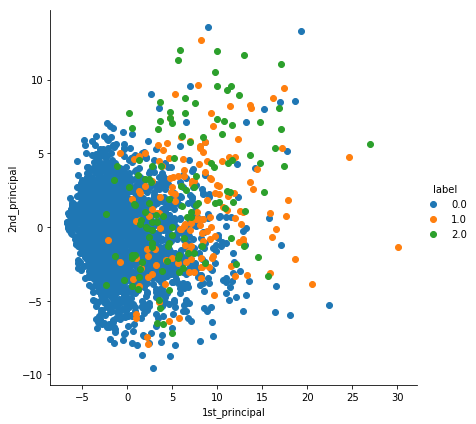

In [19]:
# attaching the label for each 2-d data point 
import seaborn as sn

#print(pca_data.shape , " " , y.shape)

pca_data = np.hstack((pca_data, y))

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# https://scipython.com/book/chapter-6-numpy/examples/vstack-and-hstack/

### applying T SNE on dataset for better visualization of data

C:\Users\Sudhanva Kote\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


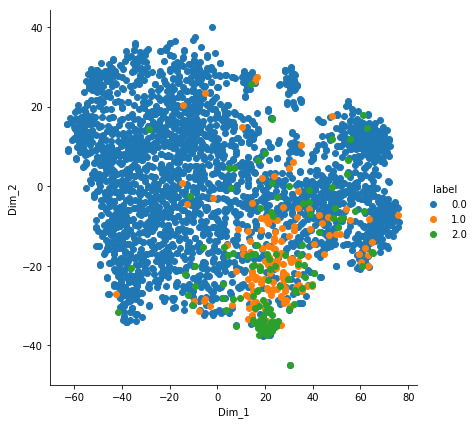

In [20]:
# TSNE

from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)

tsne_data = model.fit_transform(x)

# creating a new data frame which help us in ploting the result data
tsne_data = np.hstack((tsne_data, y))
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

 ### balancing the data by upsampling & downsampling method : SMOTE + ENN

Automatically created module for IPython interactive environment


C:\Users\Sudhanva Kote\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


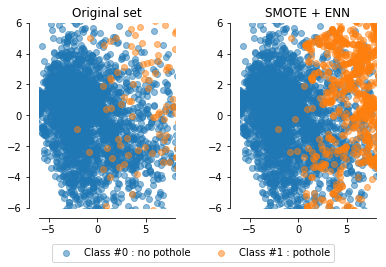

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalanceCascade

print(__doc__)

# Generate the dataset
#X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
#                           n_informative=3, n_redundant=1, flip_y=0,
#                           n_features=20, n_clusters_per_class=1,
#                           n_samples=100, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(x)

# Apply SMOTE + ENN
sm = SMOTE(k_neighbors = 5 , kind='svm')
X_resampled, y_resampled = sm.fit_sample(x,y)
X_res_vis = pca.transform(X_resampled)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

#print(X_vis.shape, " " , X_res_vis.shape , " " , y.shape , " " , y_resampled.shape)
    
y = y.reshape(y.shape[0],)
#print(y_resampled)

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0 : no pothole",alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1 : pothole",alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],label="Class #0 : no pothole", alpha=0.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],label="Class #1 : pothole", alpha=0.5)
ax2.set_title('SMOTE + ENN')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

f.legend((c0, c1), ('Class #0 : no pothole', 'Class #1 : pothole'), loc='lower center',
         ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()



In [22]:
X_resampled.shape
y_resampled.shape
#y_resampled['label'].value_counts()
a,b = np.unique(y_resampled,return_counts=True)
print(a,b)

[0 1 2] [2597 2597 2597]


## applying Logistic Regression one vs rest for multiclassficaiton

In [23]:
#acc_sum = 0
#for i in range(100):
x_train,x_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size = 0.2)

model = LogisticRegression(multi_class='ovr')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_pred,y_test) * 100
#acc_sum = acc_sum + accuracy
print(accuracy)
#acc_sum/100
print(x_train.shape, " ", x_test.shape)

C:\Users\Sudhanva Kote\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


89.86529826812058
(6232, 78)   (1559, 78)


In [25]:
confusion_matrix(y_test, y_pred)

array([[472,  24,  21],
       [ 18, 493,  33],
       [ 28,  34, 436]], dtype=int64)

## looking at the most important features in classification task : top 20 features out of 81 features

In [26]:
abs_weights = np.fabs(model.coef_) 

#print(model.coef_.shape)
#print(model.coef_)

#abs_weights.reshape(78,)

arr0 = abs_weights[0,:]
arr0.reshape(78,)
#print(arr0)
#print(arr0.shape)

sorted_asc = np.argsort(arr0)
#print(sorted_asc)

sorted_desc = np.flip(sorted_asc,axis =0)
#print("sorted arr shape",sorted_desc.shape)

top_15_features = sorted_desc[:20]
top = top_15_features.ravel()
print(top)

features_names = df_main.columns
#print(features_names)
for i in range(0,79):
    if(i in top):
        print(features_names[i])
    else:
        pass

[27 15 11 54 23 17 41 28 16 57 21 26 60 52 20 14 48  9 29 36]
sd_gx
sd_gz
min_az
min_gx
min_gy
min_gz
max_az
max_gx
max_gz
var_az
var_gx
var_gy
var_gz
quant1_ax
quant1_gz
quant3_ax
quant3_gy
mad_ax
mad_gx
skew_ax


### applying svm with rbf kernel for multiclassfn

In [27]:
model = SVC(kernel='rbf', C = 10)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

accuracy_score(y_pred,y_test)

C:\Users\Sudhanva Kote\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.986529826812059

In [28]:
confusion_matrix(y_test, y_pred)

array([[501,  10,   6],
       [  3, 541,   0],
       [  2,   0, 496]], dtype=int64)

### applying svm with default kernel

In [29]:
pca = PCA(0.99)

In [30]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
x_trans_train = pca.transform(x_train)
x_trans_test = pca.transform(x_test)

In [32]:
x_trans_train.shape

(6232, 35)

In [33]:
model = SVC()
model.fit(x_trans_train,y_train)
y_pred = model.predict(x_trans_test)

accuracy_score(y_pred,y_test)

C:\Users\Sudhanva Kote\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9884541372674791

In [34]:
confusion_matrix(y_test, y_pred)

array([[506,   7,   4],
       [  4, 540,   0],
       [  2,   1, 495]], dtype=int64)

## Applying nerural network for multi classfn

### one hot encoding of classes : https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

In [35]:

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(encoded_y_train)


# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_y_test)



#print(dummy_y[0:50])



In [47]:
# uncomment following to run neural net

acc = []
#for i in range(50):
x_train,x_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.33)
#model
model_nn = Sequential()
model_nn.add(Dense(units=100,activation="relu",input_dim =x_train.shape[1]))
model_nn.add(Dropout(0.3))
model_nn.add(Dense(units=50,activation="relu"))
model_nn.add(Dropout(0.3))
model_nn.add(Dense(units=10,activation="relu"))
model_nn.add(Dropout(0.3))
model_nn.add(Dense(units=3,activation="sigmoid"))       # 3 units for 3 classes
#model.add(Dense(units=10,activation="softmax"))

#compile
model_nn.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

#train
model_nn.fit(x_train,dummy_y_train, validation_data= (x_test, dummy_y_test), batch_size= 50, epochs= 100)



ValueError: Input arrays should have the same number of samples as target arrays. Found 5219 input samples and 6232 target samples.

In [37]:
y_pred = model_nn.predict_classes(x_test)
accuracy_score(y_test, y_pred)

0.9839640795381654

In [38]:
cnf_mat = confusion_matrix(y_test, y_pred)

In [39]:
f1_score(y_test, y_pred, average='weighted')

0.983928403893107

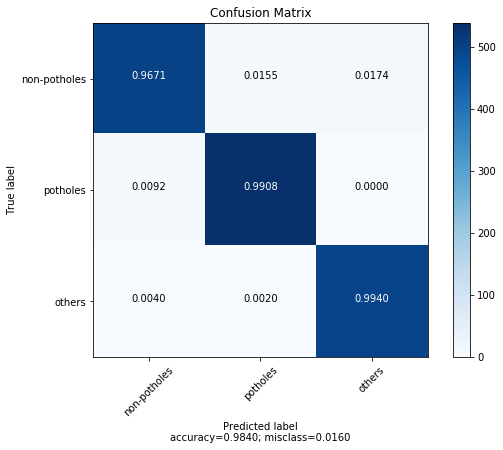

In [40]:
plot_confusion_matrix(cm           =cnf_mat, 
                      normalize    = True,
                      target_names = ['non-potholes', 'potholes', 'others'],
                      title        = "Confusion Matrix")

## saving model 

In [41]:
import pickle
pickle.dump(model,open('model_svm.pkl', 'wb'))

In [42]:
loaded_model = pickle.load(open('model_svm.pkl', 'rb'))

In [43]:
data_test = np.array(testdf_16)

x = data_test[:,0:-4]
y = data_test[:,-2:-1]
y = y.astype(int)

x.shape
y.shape


from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

# coln std our feature matrix 

x = standardized_data


(606, 78)


C:\Users\Sudhanva Kote\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Sudhanva Kote\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [44]:
confusion_matrix(y,loaded_model.predict(x[:,:-2]))

ValueError: X.shape[1] = 76 should be equal to 35, the number of features at training time

In [62]:
from keras.models import load_model

model_nn.save('model_nn.h5')

model_nn2 = load_model('model_nn.h5')

confusion_matrix(y,model_nn2.predict_classes(x[:,:-2]))

array([[540,   7,  11],
       [ 15,   7,   7],
       [  9,   1,   9]], dtype=int64)

In [60]:
len(x[1])

80

## converting pandas df to numpy array 

In [ ]:
np_array_for_server = df_main.as_matrix()

In [ ]:
np_array_for_serveray_for_server.shape

In [ ]:
np_array_for_server